In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nrrd
import pandas as pd
import os
import sys
import SimpleITK as sitk
from tqdm import tqdm
import scipy 
import scipy.io as sio

sys.path.append("/mnt/raid/C1_ML_Analysis/source/autoencoder/src")

from nets import diffusion
from generative.inferers import DiffusionInferer
from generative.networks.nets import DiffusionModelUNet
from generative.networks.schedulers import DDPMScheduler, DDIMScheduler

import monai
from monai.transforms import (    
    AsChannelFirst,
    AddChannel,
    Compose,    
    Resize,
    RandFlip,
    RandRotate,
    CenterSpatialCrop,
    ScaleIntensityRange,
    RandAdjustContrast,
    RandGaussianNoise,
    RandGaussianSmooth
)


/mnt/raid/home/jprieto/anaconda3/envs/torch_us/lib/python3.8/site-packages/neptune/internal/backends/hosted_client.py:48: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
/mnt/raid/home/jprieto/anaconda3/envs/torch_us/lib/python3.8/site-packages/pytorch_lightning/loggers/neptune.py:39: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  from neptune import new as neptune


In [2]:
sensor_data_fn = "/mnt/famli_netapp_shared/C1_ML_Analysis/src/k-wave-python/sensor_data.mat"
sensor_data = sio.loadmat(sensor_data_fn)

In [3]:
phantom_data_fn = "/mnt/famli_netapp_shared/C1_ML_Analysis/src/k-wave-python/phantom_data.mat"
phantom_data = sio.loadmat(phantom_data_fn)

In [4]:
phantom_data['density_map'].shape

(216, 300, 108)

In [5]:
np.min(phantom_data['density_map'])

933.3333333333334

In [6]:
np.max(phantom_data['density_map'])

1066.6666666666667

In [7]:
np.min(phantom_data['sound_speed_map'])

1400.0

In [8]:
np.max(phantom_data['sound_speed_map'])

1601.5913243064965

In [15]:
compressed_beamformed_data = np.load("/mnt/famli_netapp_shared/C1_ML_Analysis/src/k-wave-python/compressed_beamformed_data.npy")
wave_origin_x = np.load("/mnt/famli_netapp_shared/C1_ML_Analysis/src/k-wave-python/wave_origin_x.npy")
z = np.load("/mnt/famli_netapp_shared/C1_ML_Analysis/src/k-wave-python/z.npy")

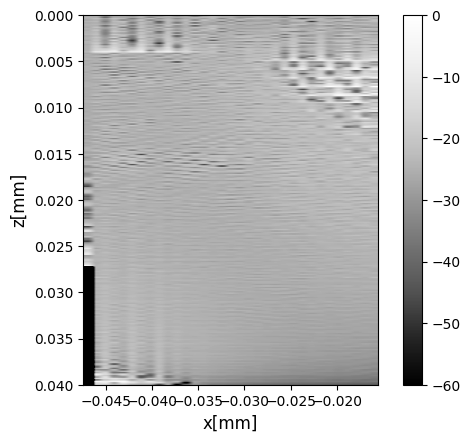

In [19]:

x_dis = wave_origin_x
z_dis = z
plt.imshow(compressed_beamformed_data, vmin=-60, vmax=0, cmap='Greys_r',
           extent=[min(x_dis), max(x_dis), max(z_dis), min(z_dis)])
plt.xlabel('x[mm]', fontsize=12)
plt.ylabel('z[mm]', fontsize=12)
plt.colorbar()
plt.show()

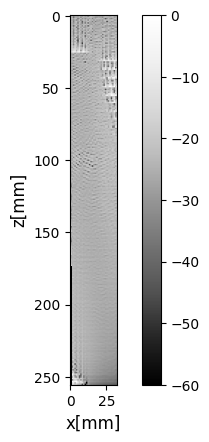

In [22]:
plt.imshow(compressed_beamformed_data, vmin=-60, vmax=0, cmap='Greys_r')
plt.xlabel('x[mm]', fontsize=12)
plt.ylabel('z[mm]', fontsize=12)
plt.colorbar()
plt.show()